In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from utility import analysis_parameters as ap
import numpy as np
import dask
from dask.diagnostics import ProgressBar
pbar = ProgressBar()
pbar.register()

colors = ap.COLORS

In [2]:
model="GEOS"
region="GT"
var_name="iwp"

In [3]:
plt.rcParams['font.size'] = '12'

# GT iwp from file

Used cdo -histcount to get bins for GT iwp histogram from native and 1deg coarsened (cdo remapcon)

## iwp native vs coarsened


(29, 2)
(29,) (29,) (29,)
(29,)
(29, 2)
(29,) (29,) (29,)


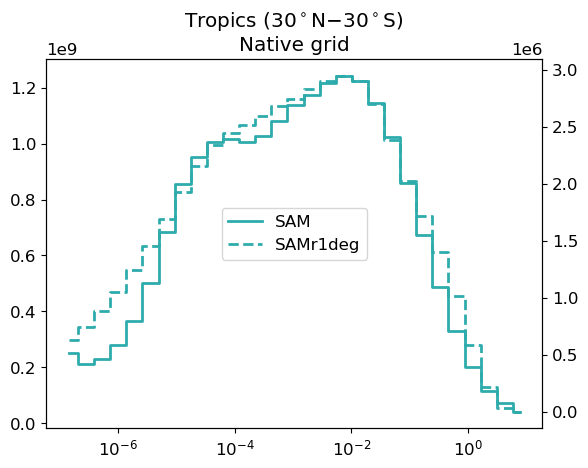

In [4]:
# iwp hist from native grid
file="/work/bb1153/b380883/GT/GT_SAM_native_iwp_hist_20200130-20200228.nc"
m="SAM"

fig = plt.figure()
iwp_hist_ds = xr.open_dataset(file)
# print(iwp_hist_ds)
iwp_hist = iwp_hist_ds.iwp.sum(dim=["time"]).isel(lat=0, lon=0)
# print(iwp_hist)
bins = iwp_hist_ds.bin_bnds
print(bins.shape)
bin_mids = (bins[:,1].values+bins[:,0].values)/2
bin_widths = bins[:,1].values-bins[:,0].values
print(iwp_hist.shape, bin_mids.shape, bin_widths.shape)

# plot it
plt.step(bin_mids, iwp_hist.values, where="mid", 
         label=m, color=colors[m], lw=2)

file="/work/bb1153/b380883/GT/GT_{}r1deg_iwp_hist_20200130-20200228.nc".format(m)
iwp_hist_ds = xr.open_dataset(file)
iwp_hist = iwp_hist_ds.iwp.isel(time=0).sum(dim=["lat","lon"])
print(iwp_hist.shape)
bins = iwp_hist_ds.bin_bnds
print(bins.shape)
bin_mids = (bins[:,1].values+bins[:,0].values)/2
bin_widths = bins[:,1].values-bins[:,0].values
print(iwp_hist.shape, bin_mids.shape, bin_widths.shape)

# plot it
plt.gca().twinx().step(bin_mids, iwp_hist.values, where="mid", 
         label=m+"r1deg", color=colors[m], linestyle="dashed",lw=2)

fig.legend(loc="center")
plt.title("Tropics (30$^\circ$N$-30^\circ$S)\nNative grid")
plt.xlabel("IWP (kg/m$^2$)")
plt.xscale("log")
# plt.ylim([0,0.5e7])
# plt.savefig("../plots/GT/iwp_hist_gt.png",dpi=140)
plt.show()

# Plot IWP hist

(29,)
(29, 2)
(29,) (29,) (29,)
(29,)
(29, 2)
(29,) (29,) (29,)
(29,)
(29, 2)
(29,) (29,) (29,)
(29,)
(29, 2)
(29,) (29,) (29,)
(29,)
(29, 2)
(29,) (29,) (29,)
(29,)
(29, 2)
(29,) (29,) (29,)
(29,)
(29, 2)
(29,) (29,) (29,)
models done, do obs
(29,)
done
saved as ../plots/GT/iwp_hist_gt_models.png


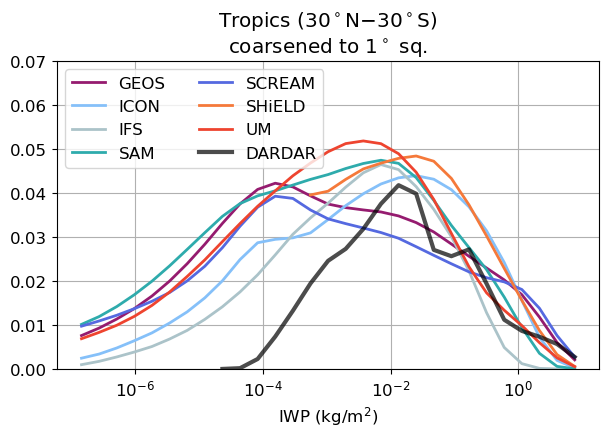

In [12]:
# Simple iwp hist (1x1deg)
models = ["GEOS","ICON","IFS","SAM", "SCREAM","SHiELD","UM"]
plt.figure(figsize=(7,4))
for i, m in enumerate(models):
    file="/work/bb1153/b380883/GT/GT_{}r1deg_iwp_hist_20200130-20200228.nc".format(m)

    iwp_hist_ds = xr.open_dataset(file)
    iwp_hist = iwp_hist_ds.iwp.isel(time=0).sum(dim=["lat","lon"])
    print(iwp_hist.shape)
    bins = iwp_hist_ds.bin_bnds
    print(bins.shape)
    bin_mids = (bins[:,1].values+bins[:,0].values)/2
    bin_widths = bins[:,1].values-bins[:,0].values
    print(iwp_hist.shape, bin_mids.shape, bin_widths.shape)
    # normalize
    if m[:2]=="GE" or m[:2]=="SA" or m[:2]=="SH" or m[:2]=="UM":
        iwp_hist = iwp_hist/(21600*2880)
    elif m[:2]=="SC":
        iwp_hist = iwp_hist/(21600*2688)
    elif m[:2]=="IC":
        iwp_hist = iwp_hist/(21600*2850)
    elif m[:2]=="IF":
        iwp_hist= iwp_hist/(21600*720)
    # plot it
    if m=="SHiELD":
        plt.plot(bin_mids[13:], iwp_hist[13:].values, #where="mid", 
             label=m, color=colors[m], lw=2)
    else:
        plt.plot(bin_mids, iwp_hist.values, #where="mid", 
             label=m, color=colors[m], lw=2)
print("models done, do obs")
iwp_hist = xr.open_dataset(ap.DARDAR_GT_IWPHIST).isel(time=0).iwp
iwp_hist = iwp_hist/37873307
print(iwp_hist.shape)
plt.plot(bin_mids[8:], iwp_hist[8:].values, label="DARDAR", 
         color=colors["OBS"], lw=3, alpha=0.7)
print("done")
plt.grid()
plt.legend(ncol=2)
plt.title("Tropics (30$^\circ$N$-30^\circ$S)\ncoarsened to $1^\circ$ sq.")
plt.xlabel("IWP (kg/m$^2$)")
plt.xscale("log")
# plt.ylim([0,0.5e7])
plt.ylim([0,0.07])
plt.savefig("../plots/GT/iwp_hist_gt_models.png",dpi=140, bbox_inches="tight", pad_inches=0.2)
print("saved as ../plots/GT/iwp_hist_gt_models.png")
plt.show()

# Global tropical cloud ice


In [11]:
chunk_dict = {"time":2880//8, "lat":250, "lon":2000} # "grid_size":500000} 
var = ap.load_iwp(model, region, total=False, chunks=chunk_dict)
var

returned ice only SAM GT


<xarray.DataArray 'clivi' (time: 2880, lat: 1612, lon: 9216)>
dask.array<open_dataset-bb2adef0eed9fb746ef882e68a94caa3clivi, shape=(2880, 1612, 9216), dtype=float32, chunksize=(360, 250, 2000), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-01-30 ... 2020-02-28T23:45:00
  * lon      (lon) float32 0.0 0.03906 0.07812 0.1172 ... 359.9 359.9 360.0
  * lat      (lat) float32 -29.99 -29.96 -29.93 -29.89 ... 29.93 29.96 29.99
Attributes:
    standard_name:  atmosphere_mass_content_of_cloud_ice
    long_name:      Ice Path
    units:          kg/m2
    cell_methods:   time: mean
    origin:         IWP

In [5]:
1.e1

10.0

In [3]:
bins = np.logspace(-7,1,12)
bins

array([1.00000000e-07, 5.33669923e-07, 2.84803587e-06, 1.51991108e-05,
       8.11130831e-05, 4.32876128e-04, 2.31012970e-03, 1.23284674e-02,
       6.57933225e-02, 3.51119173e-01, 1.87381742e+00, 1.00000000e+01])

In [14]:
if var_name[:2]=="rl":
    bins = np.linspace(80,310,40)
elif var_name[:2]=="rs":
    bins = np.linspace(-5,1300,40)
elif var_name=="clivi":
    bins = np.logspace(-7,1,40) 


In [15]:
hist, edges = dask.array.histogram(var, bins=bins, range=[bins[0],bins[-1]]) # range=[1e-7, 10], [70,320], [0,1300]
counts = hist.compute()


[##                                      ] | 7% Completed | 306.07 ss


KeyboardInterrupt: 

In [ ]:
counts

In [ ]:
counts.to_netcdf(ap.STATS+"{}/{}_{}_{}_counts.nc".format(region, region, model, var_name))

In [ ]:
## Histogram ##
x = (edges[1:]+edges[:-1])/2 # np.linspace(-7,1)
plt.plot(x, counts, color=colors[model]) #(bins[-1]-bins[0])/40) # 
plt.xscale("log")
# plt.xlim([80,310])
if var_name[0]=="r":
    plt.xlabel(" (W/m$^2$)")
elif var_name[:3]=="cli":
    plt.xlabel("IWP (kg/m$^2$)")
plt.ylabel("Count")
plt.title(model+" "+var_name)
plt.savefig("../plots/"+model+"_"+var_name+"_ITCZ.png")
plt.show()


In [3]:
# ceres syn 1hm 2001 02 - 2022 02
import xarray as xr
ds = xr.open_dataset("/work/bb1153/b380883/TWP/CERES_SYN1deg-1HM_Terra-Aqua-MODIS_Ed4.1_Subset_200102-202202.nc")
olr = ds.adj_atmos_lw_up_all_toa_1hm
olr.groupby(olr.time.dt.year).mean().mean(dim=["lat","lon"]).to_netcdf("/work/bb1153/b380883/TWP/CERES_1HM_Feb-yearly-mean.nc")

In [24]:
# ceres syn 1hm 2000 08 01 - 2019 09 10
ds = xr.open_dataset("/work/bb1153/b380883/dyamond1/TWP/TWP_CERES_yearlymean_20000801-20190910.nc").olrtoa_all
ds.mean(axis=(1,2)).to_netcdf("/work/bb1153/b380883/dyamond1/TWP/CERES_1HM_Aug1-Sept10-yearly-mean.nc")
